In [1]:
# 1. Install and import Dependenies
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [2]:
!git clone https://github.com/ultralytics/yolov5  

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip3 install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

ModuleNotFoundError: No module named 'torch'

In [14]:
# 2. Load Model
model = torch.hub.load('ultralytics/yolov5','yolov5s')


Using cache found in C:\Users\Enfusion/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-28 Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [15]:
# 3. Make Detections
img = 'https://static01.nyt.com/images/2010/10/10/us/10google2/10google2-jumbo.jpg?quality=75&auto=webp&disable=upscale'

In [16]:
results = model(img)
results.print()

image 1/1: 681x1024 1 person, 13 cars, 5 trucks
Speed: 135.5ms pre-process, 59.8ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


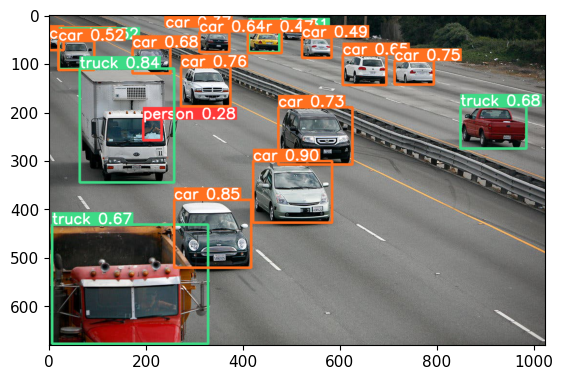

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
np.array(results.render()).shape

(1, 681, 1024, 3)

In [ ]:
# Train from scratch

In [ ]:
# Load Model

In [19]:
import torch
import cv2
import numpy as np

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Open the default camera
cap = cv2.VideoCapture(0)

while True:
    # Read frames from the camera
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    detections = results.pandas().xyxy[0]
    
    # Draw bounding boxes and labels for the detections
    for index, row in detections.iterrows():
        left = int(row['xmin'])
        top = int(row['ymin'])
        right = int(row['xmax'])
        bottom = int(row['ymax'])
        label = f'{row["name"]}: {row["confidence"]:.2f}'
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(frame, label, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    # Display the frame
    cv2.imshow('YOLO', frame)
    
    # Check if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


Using cache found in C:\Users\Enfusion/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-28 Python-3.9.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
